# Practice Code: [*kNN*](https://www.youtube.com/watch?v=9zS3aQGztQo) = k-Nearest-Neighbors

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.youtube.com/watch?v=9zS3aQGztQo"><img src="https://cdn.icon-icons.com/icons2/836/PNG/512/Youtube_icon-icons.com_66802.png" width="32"  />View video on Youtube</a>
  </td>
    
  <td>
    <a target="_blank" href="https://github.com/ValinorYT/Practice/blob/main/machine_learning/knn.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
    
  <td>
    <a target="_blank" href="https://twitter.com/ValinorYT"><img src="https://cdn.icon-icons.com/icons2/729/PNG/512/twitter_icon-icons.com_62751.png" width="32"/>Check us out on Twitter</a>
  </td>
    
</table>

This Jupyter-Notebook has 2 parts:
- a complete [implementation](#Implementation) of the kNN-classifier.
- [practice questions](#Practice-Questions) to test your understanding

## Implementation

Use this code to get comfortable with kNN. Try to change stuff up, break it, fix again, try different values for k, implement the regression-variant out of this; just let your imagination run free :)

- Don't be afraid to break something: This notebook is just a copy, if it doesn't work anymore, you can just go back to the [video](https://www.youtube.com/watch?v=9zS3aQGztQo) and load a fresh copy
- If you're learning for uni/school right now: Take a deeeep breath, you got this :)

## Datapoints

This notebook uses the same datapoints from the [video](https://www.youtube.com/watch?v=9zS3aQGztQo)

In [29]:
# First 2 entries are the coordinates, the 3rd entry is the label (The three options 0, 1 or 2).

data_from_video = [
#    x1      x2      label
    [0.37,   0.29,   1], 
    [-4.6,   1.42,   0], 
    [-2.5,   -0.54,  2], 
    [-1.14,  -3.39,  2], 
    [0.7,    -2.66,  2], 
    [-3.27,  2.01,   0], 
    [-1.73,  0.54,   0],
    [-0.07,  0.07,   1], 
    [4.78,   0.28,   1], 
    [-1.4,   -2.03,  2], 
    [-0.68,  -1.08,  0], 
    [-2.5,   1.49,   0], 
    [-0.32,  -2.51,  2], 
    [1.58,   1.31,   1],
    [-1.99,  2.49,   1], 
    [2.05,   3,      1], 
    [3.1,    2.5,    1]
]

## Methods needed for the classifier

In [30]:
from math import sqrt # Square-root of a single number
import numpy          # Used for the euclidean distance

# Sorts the points in ascending order by their distance to x.
# -> The point at index 0 in the result is the closest one, the last point is the furthest.
def sort_by_distance(data, x):
    return sorted(data, key=lambda point: numpy.linalg.norm(x - numpy.array(point[:2])))

In [31]:
from statistics import mode # The mode of a collection of elements is the most common element

# returns the most common label of the k nearest neighbors of x
def make_prediction(data, x, k):
    data_sorted_by_distance = sort_by_distance(data, x)
    nearest_k_points = data_sorted_by_distance[:k]    # [:k] selects elements from index 0 up to index k-1 (but not k)
    labels = [point[2] for point in nearest_k_points] # Only take the 3rd entry for each datapoint, which is the label
    return mode(labels)                               # return the most common label 

## Use the kNN-classifier

Now we just need to apply our work to the datapoints we created at the top of the notebook.
Aditionally we plot the points so that we can check by eye if the results are correct.

The prediction is: 2


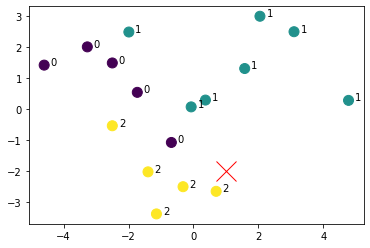

In [32]:
import matplotlib.pyplot as plt    # used for the scatterplot

x = [1, -2]                        # coordinates of the new point whose label we are looking for
plt.plot(*x,'rx', markersize=20)   # plot this point as a big red cross (r stands for red, x for cross)

# Remark: c ~ color, s ~ size
plt.scatter([x[0] for x in data_from_video], [x[1] for x in data_from_video], c=[x[2] for x in data_from_video], s=100)

# add labels to the datapoints (kinda clunky, I know :/ )
for i, label in enumerate([x[2] for x in data_from_video]):    
    plt.annotate(label, (data_from_video[i][0]+ 0.2, data_from_video[i][1]))
    
    
    
prediction = make_prediction(data_from_video, x, k=3)
print("The prediction is:", prediction)

### Ideas for the implementation

- Try a wild range of combinations for *x* and *k*
- Implement the variant for regression
- Code the distance-function yourself (right now *numpy.linalg.norm* (the [euclidean norm](https://en.wikipedia.org/wiki/Euclidean_norm))is used)
- What other distance-functions exist? Try some out
- Use another data-set, for example the [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Practice-Questions

- Does k-NN do more computation on test-time or on train-time?

*Double-Click* here for **ANSWER**
<!-- 

In the training phase only of stores the coordinates and class-labels of the training data.

When running kNN, the distances to all points have to be computed, which takes way longer.

Algorithms like this are called LAZY learners https://sebastianraschka.com/faq/docs/lazy-knn.html

-->

- What does *k* stand for?

*Double-Click* here for **ANSWER**
<!-- 

The number of neighbors that are looked at

-->

- If k=1, is the algorithm more likely to over- or under-fit?

*Double-Click* here for **ANSWER**
<!-- 

If k=1, you just look at the CLOSEST point. If the point is an outlier, this is still the only training data used to make the transition.
Check out the video for this: https://youtu.be/9zS3aQGztQo?t=33

-->

- What happens if you set *k* the number of datapoints?

*Double-Click* here for **ANSWER**
<!-- 

The algorithm just always predicts the same thing: The most common class of the datapoints.

-->

## The END

![ChessUrl](https://media2.giphy.com/media/5IT69msgpaOcg/giphy.gif?cid=ecf05e47e5ntgnc6gidu81abnk60hb7qkrrd33uy7mjir9kd&rid=giphy.gif&ct=g "chess")

- If you really enjoyed this notebook, write a message on [Twitter](https://twitter.com/ValinorYT).
- If you found a bug, also write on Twitter or create an Issue on [GitHub](https://github.com/ValinorYT/Practice/blob/main/machine_learning/knn.ipynb).